In [1]:
import xarray as xr 
import netCDF4 as nc 
from matplotlib import pyplot as plt
import numpy as np
import scipy
import scipy.signal
from netCDF4 import Dataset
import xrscipy.other.signal as dsp
import pyart 
import pandas as pd
import hvplot.xarray
import holoviews as hv
import matplotlib
import datetime
hv.extension("bokeh")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
data = '/Users/tehreemqureshi/Downloads/smokey_CL61.nc'
ds = xr.open_dataset(data)
da = ds['backscatter']

In [4]:
backscatter = ds.backscatter.isel(range=0).values.ravel()

In [11]:
y = ds['backscatter']
x = ds['backscatter'].time
# plt.hist2d(xedges_datetime, y, bins=(20,20), cmap=pyart.graph.cm_colorblind.ChaseSpectral)
# plt.colorbar()
# plt.xlabel('Time')
# plt.ylabel(da.long_name + da.units)
# plt.title('2D Histogram of Time versus Backscatter Values')
# compute the 2D histogram using numpy
H,xedges,yedges = np.histogram2d(ds.time.values, backscatter, bins=[24,10])
# convert the x-edges into datetime format
to_datetime = np.vectorize(datetime.datetime.fromtimestamp)
xedges_datetime = pd.to_datetime(xedges)
print(len (xedges_datetime))
#bifreq, xedges, yedges = np.histogram2d(
                # xedges_datetime, y, bins=(25, 100), normed=True)
# X, Y = np.meshgrid(xedges, yedges) 

25


[-6.21107483 -5.98112276 -5.75117068 -5.52121861 -5.29126654 -5.06131446
 -4.83136239 -4.60141032 -4.37145824 -4.14150617 -3.9115541 ]


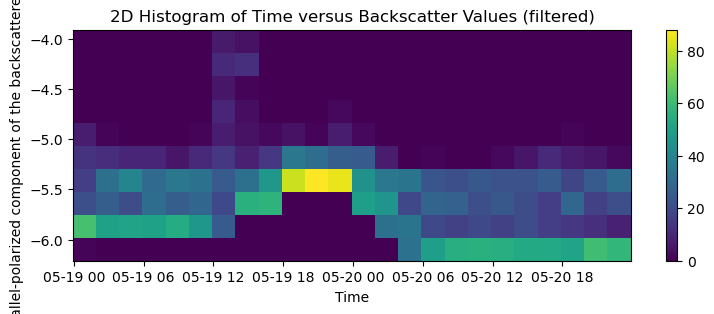

In [12]:
x = ds['backscatter'].time
y=da.rolling(range=30).mean().isel(range=50)
#plt.hist2d(xedges_datetime, yedges, bins=(25,11), cmap=pyart.graph.cm_colorblind.ChaseSpectral)
fig = plt.figure(figsize=(9, 3))
plt.pcolor(xedges_datetime, yedges, H.T)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel(da.long_name)  
plt.title('2D Histogram of Time versus Backscatter Values (filtered)')
print (yedges)